# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Renato M. Silva</center></font>
<br/>
<br/>

## <center>Avaliação Continuada 2 (AC2)</center>

----
### <center>Nome e RA dos componentes do grupo</center>

    
| Nome     |      RA      | 
|:-        |:-------------:|
|Felipe Galdino dos Santos          |171038              | 
|          |              | 
|          |              | 
|          |              | 
    

----
### Instruções
**1**. Siga boas práticas de programação:
- dar nomes intuitivos para as variáveis
- dar nomes intuitivos para as funções

**2**. O trabalho pode ser feito em grupos de até 3 pessoas. Porém, não é permitido que o grupo tenha pessoas de uma turma diferente da sua.  Apenas uma pessoa do grupo deve submeter o trabalho. Você deve submeter apenas o arquivo .ipynb.

**3**. Em todos os exercícios, as imagens finais solicitadas devem estar no formato **uint8**.

**4**. Não é permitido usar nenhuma outra biblioteca de processamento de imagens além da OpenCV.

**5**. Cuidado com plágio. Se for detectado plágio entre grupos, a punição será dada para todos os componentes dos grupos envolvidos.

**6**. Antes de submeter o notebook, certifique-se que não há erros de código. Uma forma de se certificar disso é usar a opção **"Reiniciar Kernel e executar todas as células"** do Jupyter ou a opção **"Reiniciar e executar tudo"** do Google Colab. 

----
## Exercicio 1

 - a) Crie uma matriz usando a biblioteca numpy.
 - b) Transforme essa matriz em uma imagem que corresponda a bandeira da Malásia, apresentada abaixo. 
 - c) Plote a imagem resultante.
 - d) Salve a imagem resultante na pasta **figsResultado** com o nome **ex01.png**

 <img src="figsNotebook/malasia_flag.png" width="255" height="128" />
  

 
Para gerar a bandeira da Malásia, você poderá fazer apenas as seguintes operações:

- operações morfológicas nos símbolos contidos na imagem **malasia_flagSymbols.png** disponível na pasta **figs** para remover os pontos brancos;
- operações aritméticas entre a matriz e os símbolos contidos na imagem **malasia_flagSymbols.png** disponível na pasta **figs**; 
- operações matriciais, tanto para gerar e transformar cores, quanto para gerar os retângulos que fazem parte da bandeira.

Obs: as únicas funções prontas da biblioteca OpenCV que podem ser usadas neste exercícios são as que executam operações morfológicas.

(1155, 586, 4)
[0 0 0 0]
[  0   0   0 255]
(1155, 586, 3)
opening shape (1155, 586, 4)
[255 255 255 255]
[  0   0   0 255]
opening shape after (1155, 586, 4)
[0 0 0 0]
[  0   0   0 255]
sol (630, 586, 4)
lua (525, 586, 4)
(1600, 2100, 4)


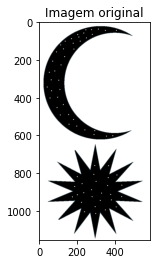

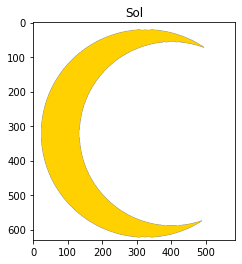

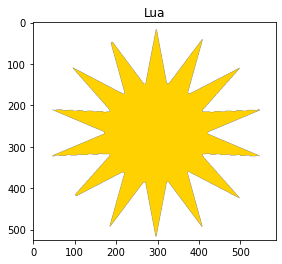

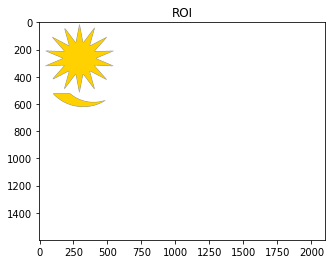

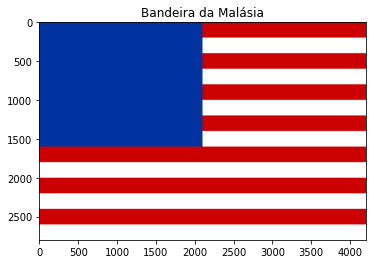

In [117]:
##### Resolva o exercício aqui
from cv2 import solve
import numpy as np
import cv2  
import matplotlib.pyplot as plt

QUANT_LISTRAS = 14
flag_height=200 * QUANT_LISTRAS # precisa ser multiplo de 14, pois sao 14 listras na bandeira
flag_length = int(1.5 * flag_height)
bandeira_malasia = np.zeros([flag_height,flag_length,3], dtype=np.uint8)
redPixel = [204,0,0]
whitePixel = [255,255,255]
bluePixel = [0,50,160]
yellowPixel = [255,209,0]

for i in range(14):
  bandeira_malasia[i*int(flag_height/14):(i+1)*int(flag_height/14),:] = redPixel if i%2==0 else whitePixel

 
bandeira_malasia[0:8*int(flag_height/14),0:int(flag_length/2)] = bluePixel

# abre a imagem setando o oparâmetro IMREAD_UNCHANGED para que
# ela seja aberta no formato BGRA: um formato igual ao BGR, mas que possui também um canal alpha (a parte transparente)
imgBGRA = cv2.imread('figs/malasia_flagSymbols.png', cv2.IMREAD_UNCHANGED)
print(imgBGRA.shape)
print(imgBGRA[10,10])
print(imgBGRA[900,300])

# converte a imagem de BGRA para RGB
imgRGB = cv2.cvtColor(imgBGRA, cv2.COLOR_BGRA2RGB)
print(imgRGB.shape)

# os locais transparentes da imagem BGRA possuem valores 0 no canal alpha (índice 3)
# o código abaixo captura os pixels transparentes da imagem BGRA e transforma os respectivos pixels
# da imagem RGB para vermelho
imgRGB[ imgBGRA[:,:,3] == 0 ] = [255,255,255]



imgGray = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(imgGray, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)


opening = cv2.cvtColor(opening, cv2.COLOR_GRAY2RGBA)
print(f'opening shape {opening.shape}')
print(opening[0,0])
print(opening[900,300])

opening[ opening[:,:,0] == 255] = [0,0,0,0]
print(f'opening shape after {opening.shape}')
print(opening[0,0])
print(opening[900,300])

imgCompleta = opening

imgCompleta[ imgCompleta[:,:,3] == 255 ] = yellowPixel + [255]


sol = imgCompleta[:630,:]
print(f'sol {sol.shape}')
lua = imgCompleta[630:,:]
print(f'lua {lua.shape}')



#dst = cv2.addWeighted(img1,0.5,img2,0.7,0)

#dilation[np.where((dilation==[0,0,0]).all(axis=2))] = yellowPixel

#imgRGB[np.where((imgRGB==[0,0,0]).all(axis=2))] = yellowPixel

#r, g, b = cv2.split(imgRGB)

roi = np.zeros([8*int(flag_height/14),int(flag_length/2),4], dtype=np.uint8)
print(roi.shape)


roi[0:630,0:586,0:3] = sol[:,:,0:3]
roi[0:525,0:586,0:3] = lua[:,:,0:3]

for x in range(roi.shape[0]):
  for y in range(roi.shape[1]):
    #print(pixel)
    for i in range(3):
      if roi[x][y][i] != 0:
        roi[x][y] = [roi[x][y][0], roi[x][y][1], roi[x][y][2], 255] # [r,g,b,a]
        break








plt.imshow(imgBGRA)
plt.title('Imagem original')
plt.show()

plt.imshow(sol)
plt.title('Sol')
plt.show()

plt.imshow(lua)
plt.title('Lua')
plt.show()

plt.imshow(roi)
plt.title('ROI')
plt.show()

plt.imshow(bandeira_malasia)
plt.title('Bandeira da Malásia')
plt.show()



----
## Exercício 2

Sabe-se que é possível reduzir o efeito de borramento de uma imagem por meio da operação de realce de contraste que irá gerar uma nova imagem onde cada pixel $g$ recebe o valor definido pela equação a seguir:

$$g = 
\begin{cases}
f \ominus b \text{, } & \text{ se } f - (f \ominus b) <  ( f \oplus b ) - f \\
f \oplus b\text{, } & \text{ caso contrário }
\end{cases}
$$

Na equação acima, $f \ominus b$ é o resultado da operação de erosão no pixel $f$ usando o elemento estruturante $b$. Por outro lado, $f \oplus b$ é o resultado da operação de dilatação no pixel $f$ usando o elemento estruturante $b$.

Implemente a operação de realce descrita acima e aplique na imagem **img/borramento.jpg**. Depois disso, plote a imagem resultante na tela e também salve na pasta **figsResultado** com o nome **ex02.png**

Obs: neste exercício só é permitido usar função pronta da biblioteca OpenCV para fazer as operações de erosão e dilatação. 

In [ ]:
##### Resolva o exercício aqui


----
## Exercício 3

Sabe-se que é possível reduzir o efeito de borramento de uma imagem $f$ por meio de uma operação de realce de contraste que gera uma nova imagem $g$ resultante da combinação das transformadas **top-hat** e **bottom-hat**, conforme a seguinte equação:

$$g = 
f+TH(f)-BH(f)
$$

Na equação acima, $TH(f)$ é o resultado da transformada  **top-hat** na imagem $f$ e $BH(f)$ é o resultado da operação **bottom-hat** na imagem $f$.

Implemente a operação de realce descrita acima e aplique na imagem **img/borramento.jpg**. Depois disso, plote a imagem resultante na tela e também salve na pasta **figsResultado** com o nome **ex03.png**

Obs: neste exercício só é permitido usar função pronta da biblioteca OpenCV para fazer as operações de erosão e dilatação. 

In [ ]:
##### Resolva o exercício aqui



----
## Exercicio 4

Remova o ruído da imagem **facens1_ruido.png** usando operações morfológicas. O resultado mínimo esperado é apresentado na imagem a seguir. Depois disso, plote a imagem resultante na tela e também salve na pasta **figsResultado** com o nome **ex04.png**

<img src="figsNotebook/facens1_ruidoCorrigido.png" width="500"/>

In [ ]:
##### Resolva o exercício aqui



----
## Exercicio 5

Remova o ruído da imagem **facens2_ruido.png** usando um ou mais filtros. O resultado mínimo esperado é apresentado na imagem a seguir. Depois disso, plote a imagem resultante na tela e também salve na pasta **figsResultado** com o nome **ex05.png**

<img src="figsNotebook/facens2_ruidoCorrigido.png" width="500"/>

In [ ]:
##### Resolva o exercício aqui



----
## Exercicio 6

Faça uma função chamada **retornaCor** que deve receber uma imagem como entrada e retornar a cor predominante na imagem. Para isso, ela deve extrair o histograma de cada canal de cor da imagem de entrada e fazer uma análise deles para inferir a cor predominante. Teste a função criada nas imagens disponíveis no diretório **figs/objetos/** e imprima o nome de cada arquivo e a cor inferida.

In [ ]:
##### Resolva o exercício aqui



----
## Exercicio 7

Aumentar um único tom de cinza em alguns pixels de uma imagem qualquer irá gerar uma alteração visualmente imperceptível. 

Considerando a afirmação acima, crie uma função chamada **criptografar** que deve receber duas imagens de entrada. Considere que a primeira imagem terá uma dimensão menor ou igual a da segunda imagem. Considere também que a primeira imagem contém um texto de um única cor e de tamanho arbitrário. A função deve retornar uma nova imagem que esconda a primeira imagem na segunda.

 - a limiarização pode ser usada para transformar os tons de cinza da primeira imagem para um tom de cinza desejado
 - uma operação aritmética pode ser usada para esconder a primeira imagem na segunda

Use a função acima para esconder a imagem **figs/mensagemSecreta.png** dentro da imagem **terra.jpg**, mostre a imagem resultante na tela e salve na pasta **figsResultado** com o nome **ex07_criptografada.png**

Crie uma função chamada **descriptografar** que deve receber duas imagem. A primeira delas é uma imagem que contém uma mensagem escondida. A segunda imagem é a original antes da operação de criptografia. A função deve retornar uma nova imagem que contenha a mensagem escondida (visível) extraída da primeira imagem fornecida como parâmetro da função. 
 - uma operação aritmética pode ser usada para extrair a imagem escondida
 - a limiarização pode ser usada para transformar os tons de cinza da mensagem escondida em um tom de cinza desejado

Use a função **descriptografar** para revelar a mensagem contida dentro da imagem retornada pela primeira função (**figsAlunos/ex07_criptografada.png**), mostre a imagem resultante na tela e salve na pasta **figsResultado** com o nome **ex07_descriptografada.png**.

Obs: as funções acima devem ser genéricas, ou seja, devem funcionar para quaisquer imagens passadas como entrada.

In [ ]:
##### Resolva o exercício aqui


----
## Exercicio 8

Crie uma função chamada **separar** que receba o endereço de dois diretório como parâmetro. Essa função deve criar duas subpastas no **segundo** diretório, chamadas **ex08_claro** e **ex08_escuro**. Ela deve identificar automaticamente se cada uma das imagens contidas no primeiro diretório é clara ou escura. 

 - Se a função identificar que a imagem é escura, ela deve fazer a equalização do histograma. Salve a imagem equalizada dentro da pasta **ex08_escuro**.
 
 - Se a função identificar que a imagem é clara, ela deve criar duas novas imagens com versões escurecidas: a primeira deve ser escurecida por meio de subtração, enquanto a segunda deve ser escurecida por meio de multiplicação. Depois disso, faça a equalização das duas imagens escurecidas. Salve as duas imagens escurecidas e suas versões equalizadas dentro da pasta **ex08_claro**.
 - Arredonde valores fracionários gerados pela operação aritmética
 - Trate os valores inválidos gerados pela operação aritmética com a técnica de saturação
 
Teste a função passando como parâmetro os endereços dos diretórios **figs/estrada/** e **figsResultado**, respectivamente.

Dica:
 - para identificar se a imagem é clara ou escura você pode usar informações do histograma

In [ ]:
##### Resolva o exercício aqui
